# Implementation of glow in 3D using TFP

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
tfd = tfp.distributions
tfb = tfp.bijectors
import itertools


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
import sys
sys.path.insert(0, '../..')
from utils.bijectors import Squeeze3d, Conv1x1_3D, AffineGlow3d, Actnorm3D 

In [3]:
# Produces the list of bijectors to chain in order to make one step of
# Glow

#tfb.BatchNormalization(training=is_training), #Actnorm3D()] #,
               #onv1x1_3D(name='%s/conv1x1_%d'%(name,i)),
               
def mk_glow_steps(name, nsteps, is_training=True):
    chain = [[ AffineGlow3d(name='%s/coupling_%d'%(name,i))] 
             for i in range(nsteps)]
    return list(itertools.chain.from_iterable(chain))

In [4]:
input_shape = 32
cube_size = 32
nchannels = 1

glow = tfb.Chain(
    [tfb.Invert(Squeeze3d(event_shape_in=[cube_size, cube_size, cube_size, nchannels]))] +
    mk_glow_steps('block1', 16)  +    
    [tfb.Invert(Squeeze3d(event_shape_in=[cube_size//2,cube_size//2,cube_size//2,nchannels*8]))] +
    mk_glow_steps('block2', 16)  +
#     [tfb.Invert(Squeeze3d(event_shape_in=[cube_size//4,cube_size//4,cube_size//4,nchannels*64]))] +
#     mk_glow_steps('block3', 16)  +
#     [Squeeze3d(event_shape_in=[cube_size//4,cube_size//4,cube_size//4,nchannels*64])] +
    mk_glow_steps('block4', 16)  +
    [Squeeze3d(event_shape_in=[cube_size//2,cube_size//2,cube_size//2,nchannels*8])] +
    mk_glow_steps('block5', 16)  +
    [Squeeze3d(event_shape_in=[cube_size, cube_size, cube_size, nchannels])])

In [5]:
tf.reset_default_graph()

prior = tfd.Independent(tfd.Normal(loc=tf.zeros((32,32,32,32,1)), scale=1.))
y = prior.sample() + 1.

distribution = tfd.TransformedDistribution(distribution=prior, bijector=glow)
log_prob = distribution.log_prob(y)


# bij = glow
# xs = prior.sample() + 1.

# y = bij.forward(xs)
# xr = bij.inverse(tf.identity(y))

Instructions for updating:
Colocations handled automatically by placer.


ValueError: Dimensions must be equal, but are 8 and 32 for 'chain_of_invert_squeeze_of_block1/coupling_0_of_block1/coupling_1_of_block1/coupling_2_of_block1/coupling_3_of_block1/coupling_4_of_block1/coupling_5_of_block1/coupling_6_of_block1/coupling_7_of_block1/coupling_8_of_block1/coupling_9_of_block1/coupling_10_of_block1/coupling_11_of_block1/coupling_12_of_block1/coupling_13_of_block1/coupling_14_of_block1/coupling_15_of_invert_squeeze_of_block2/coupling_0_of_block2/coupling_1_of_block2/coupling_2_of_block2/coupling_3_of_block2/coupling_4_of_block2/coupling_5_of_block2/coupling_6_of_block2/coupling_7_of_block2/coupling_8_of_block2/coupling_9_of_block2/coupling_10_of_block2/coupling_11_of_block2/coupling_12_of_block2/coupling_13_of_block2/coupling_14_of_block2/coupling_15_of_block4/coupling_0_of_block4/coupling_1_of_block4/coupling_2_of_block4/coupling_3_of_block4/coupling_4_of_block4/coupling_5_of_block4/coupling_6_of_block4/coupling_7_of_block4/coupling_8_of_block4/coupling_9_of_block4/coupling_10_of_block4/coupling_11_of_block4/coupling_12_of_block4/coupling_13_of_block4/coupling_14_of_block4/coupling_15_of_squeeze_of_block5/coupling_0_of_block5/coupling_1_of_block5/coupling_2_of_block5/coupling_3_of_block5/coupling_4_of_block5/coupling_5_of_block5/coupling_6_of_block5/coupling_7_of_block5/coupling_8_of_block5/coupling_9_of_block5/coupling_10_of_block5/coupling_11_of_block5/coupling_12_of_block5/coupling_13_of_block5/coupling_14_of_block5/coupling_15_of_squeezeIndependentNormal/log_prob/chain_of_invert_squeeze_of_block1/coupling_0_of_block1/coupling_1_of_block1/coupling_2_of_block1/coupling_3_of_block1/coupling_4_of_block1/coupling_5_of_block1/coupling_6_of_block1/coupling_7_of_block1/coupling_8_of_block1/coupling_9_of_block1/coupling_10_of_block1/coupling_11_of_block1/coupling_12_of_block1/coupling_13_of_block1/coupling_14_of_block1/coupling_15_of_invert_squeeze_of_block2/coupling_0_of_block2/coupling_1_of_block2/coupling_2_of_block2/coupling_3_of_block2/coupling_4_of_block2/coupling_5_of_block2/coupling_6_of_block2/coupling_7_of_block2/coupling_8_of_block2/coupling_9_of_block2/coupling_10_of_block2/coupling_11_of_block2/coupling_12_of_block2/coupling_13_of_block2/coupling_14_of_block2/coupling_15_of_block4/coupling_0_of_block4/coupling_1_of_block4/coupling_2_of_block4/coupling_3_of_block4/coupling_4_of_block4/coupling_5_of_block4/coupling_6_of_block4/coupling_7_of_block4/coupling_8_of_block4/coupling_9_of_block4/coupling_10_of_block4/coupling_11_of_block4/coupling_12_of_block4/coupling_13_of_block4/coupling_14_of_block4/coupling_15_of_squeeze_of_block5/coupling_0_of_block5/coupling_1_of_block5/coupling_2_of_block5/coupling_3_of_block5/coupling_4_of_block5/coupling_5_of_block5/coupling_6_of_block5/coupling_7_of_block5/coupling_8_of_block5/coupling_9_of_block5/coupling_10_of_block5/coupling_11_of_block5/coupling_12_of_block5/coupling_13_of_block5/coupling_14_of_block5/coupling_15_of_squeeze_1/inverse_log_det_jacobian/block1/coupling_0/inverse_log_det_jacobian/mul' (op: 'Mul') with input shapes: [16,16,16,8], [32].

In [6]:
distribution = tfd.TransformedDistribution(distribution=prior, bijector=bij)
log_prob = distribution.log_prob(y)

ValueError: Dimensions must be equal, but are 16 and 32 for 'chain_of_invert_squeeze_of_batch_normalization_of_block1/conv1x1_0_of_block1/coupling_0_of_batch_normalization_of_block1/conv1x1_1_of_block1/coupling_1_of_batch_normalization_of_block1/conv1x1_2_of_block1/coupling_2_of_batch_normalization_of_block1/conv1x1_3_of_block1/coupling_3_of_batch_normalization_of_block1/conv1x1_4_of_block1/coupling_4_of_batch_normalization_of_block1/conv1x1_5_of_block1/coupling_5_of_batch_normalization_of_block1/conv1x1_6_of_block1/coupling_6_of_batch_normalization_of_block1/conv1x1_7_of_block1/coupling_7_of_batch_normalization_of_block1/conv1x1_8_of_block1/coupling_8_of_batch_normalization_of_block1/conv1x1_9_of_block1/coupling_9_of_batch_normalization_of_block1/conv1x1_10_of_block1/coupling_10_of_batch_normalization_of_block1/conv1x1_11_of_block1/coupling_11_of_batch_normalization_of_block1/conv1x1_12_of_block1/coupling_12_of_batch_normalization_of_block1/conv1x1_13_of_block1/coupling_13_of_batch_normalization_of_block1/conv1x1_14_of_block1/coupling_14_of_batch_normalization_of_block1/conv1x1_15_of_block1/coupling_15_of_invert_squeeze_of_batch_normalization_of_block2/conv1x1_0_of_block2/coupling_0_of_batch_normalization_of_block2/conv1x1_1_of_block2/coupling_1_of_batch_normalization_of_block2/conv1x1_2_of_block2/coupling_2_of_batch_normalization_of_block2/conv1x1_3_of_block2/coupling_3_of_batch_normalization_of_block2/conv1x1_4_of_block2/coupling_4_of_batch_normalization_of_block2/conv1x1_5_of_block2/coupling_5_of_batch_normalization_of_block2/conv1x1_6_of_block2/coupling_6_of_batch_normalization_of_block2/conv1x1_7_of_block2/coupling_7_of_batch_normalization_of_block2/conv1x1_8_of_block2/coupling_8_of_batch_normalization_of_block2/conv1x1_9_of_block2/coupling_9_of_batch_normalization_of_block2/conv1x1_10_of_block2/coupling_10_of_batch_normalization_of_block2/conv1x1_11_of_block2/coupling_11_of_batch_normalization_of_block2/conv1x1_12_of_block2/coupling_12_of_batch_normalization_of_block2/conv1x1_13_of_block2/coupling_13_of_batch_normalization_of_block2/conv1x1_14_of_block2/coupling_14_of_batch_normalization_of_block2/conv1x1_15_of_block2/coupling_15_of_invert_squeeze_of_batch_normalization_of_block3/conv1x1_0_of_block3/coupling_0_of_batch_normalization_of_block3/conv1x1_1_of_block3/coupling_1_of_batch_normalization_of_block3/conv1x1_2_of_block3/coupling_2_of_batch_normalization_of_block3/conv1x1_3_of_block3/coupling_3_of_batch_normalization_of_block3/conv1x1_4_of_block3/coupling_4_of_batch_normalization_of_block3/conv1x1_5_of_block3/coupling_5_of_batch_normalization_of_block3/conv1x1_6_of_block3/coupling_6_of_batch_normalization_of_block3/conv1x1_7_of_block3/coupling_7_of_batch_normalization_of_block3/conv1x1_8_of_block3/coupling_8_of_batch_normalization_of_block3/conv1x1_9_of_block3/coupling_9_of_batch_normalization_of_block3/conv1x1_10_of_block3/coupling_10_of_batch_normalization_of_block3/conv1x1_11_of_block3/coupling_11_of_batch_normalization_of_block3/conv1x1_12_of_block3/coupling_12_of_batch_normalization_of_block3/conv1x1_13_of_block3/coupling_13_of_batch_normalization_of_block3/conv1x1_14_of_block3/coupling_14_of_batch_normalization_of_block3/conv1x1_15_of_block3/coupling_15_of_squeeze_of_batch_normalization_of_block4/conv1x1_0_of_block4/coupling_0_of_batch_normalization_of_block4/conv1x1_1_of_block4/coupling_1_of_batch_normalization_of_block4/conv1x1_2_of_block4/coupling_2_of_batch_normalization_of_block4/conv1x1_3_of_block4/coupling_3_of_batch_normalization_of_block4/conv1x1_4_of_block4/coupling_4_of_batch_normalization_of_block4/conv1x1_5_of_block4/coupling_5_of_batch_normalization_of_block4/conv1x1_6_of_block4/coupling_6_of_batch_normalization_of_block4/conv1x1_7_of_block4/coupling_7_of_batch_normalization_of_block4/conv1x1_8_of_block4/coupling_8_of_batch_normalization_of_block4/conv1x1_9_of_block4/coupling_9_of_batch_normalization_of_block4/conv1x1_10_of_block4/coupling_10_of_batch_normalization_of_block4/conv1x1_11_of_block4/coupling_11_of_batch_normalization_of_block4/conv1x1_12_of_block4/coupling_12_of_batch_normalization_of_block4/conv1x1_13_of_block4/coupling_13_of_batch_normalization_of_block4/conv1x1_14_of_block4/coupling_14_of_batch_normalization_of_block4/conv1x1_15_of_block4/coupling_15_of_squeeze_of_batch_normalization_of_block5/conv1x1_0_of_block5/coupling_0_of_batch_normalization_of_block5/conv1x1_1_of_block5/coupling_1_of_batch_normalization_of_block5/conv1x1_2_of_block5/coupling_2_of_batch_normalization_of_block5/conv1x1_3_of_block5/coupling_3_of_batch_normalization_of_block5/conv1x1_4_of_block5/coupling_4_of_batch_normalization_of_block5/conv1x1_5_of_block5/coupling_5_of_batch_normalization_of_block5/conv1x1_6_of_block5/coupling_6_of_batch_normalization_of_block5/conv1x1_7_of_block5/coupling_7_of_batch_normalization_of_block5/conv1x1_8_of_block5/coupling_8_of_batch_normalization_of_block5/conv1x1_9_of_block5/coupling_9_of_batch_normalization_of_block5/conv1x1_10_of_block5/coupling_10_of_batch_normalization_of_block5/conv1x1_11_of_block5/coupling_11_of_batch_normalization_of_block5/conv1x1_12_of_block5/coupling_12_of_batch_normalization_of_block5/conv1x1_13_of_block5/coupling_13_of_batch_normalization_of_block5/conv1x1_14_of_block5/coupling_14_of_batch_normalization_of_block5/conv1x1_15_of_block5/coupling_15_of_squeezeIndependentNormal/log_prob/chain_of_invert_squeeze_of_batch_normalization_of_block1/conv1x1_0_of_block1/coupling_0_of_batch_normalization_of_block1/conv1x1_1_of_block1/coupling_1_of_batch_normalization_of_block1/conv1x1_2_of_block1/coupling_2_of_batch_normalization_of_block1/conv1x1_3_of_block1/coupling_3_of_batch_normalization_of_block1/conv1x1_4_of_block1/coupling_4_of_batch_normalization_of_block1/conv1x1_5_of_block1/coupling_5_of_batch_normalization_of_block1/conv1x1_6_of_block1/coupling_6_of_batch_normalization_of_block1/conv1x1_7_of_block1/coupling_7_of_batch_normalization_of_block1/conv1x1_8_of_block1/coupling_8_of_batch_normalization_of_block1/conv1x1_9_of_block1/coupling_9_of_batch_normalization_of_block1/conv1x1_10_of_block1/coupling_10_of_batch_normalization_of_block1/conv1x1_11_of_block1/coupling_11_of_batch_normalization_of_block1/conv1x1_12_of_block1/coupling_12_of_batch_normalization_of_block1/conv1x1_13_of_block1/coupling_13_of_batch_normalization_of_block1/conv1x1_14_of_block1/coupling_14_of_batch_normalization_of_block1/conv1x1_15_of_block1/coupling_15_of_invert_squeeze_of_batch_normalization_of_block2/conv1x1_0_of_block2/coupling_0_of_batch_normalization_of_block2/conv1x1_1_of_block2/coupling_1_of_batch_normalization_of_block2/conv1x1_2_of_block2/coupling_2_of_batch_normalization_of_block2/conv1x1_3_of_block2/coupling_3_of_batch_normalization_of_block2/conv1x1_4_of_block2/coupling_4_of_batch_normalization_of_block2/conv1x1_5_of_block2/coupling_5_of_batch_normalization_of_block2/conv1x1_6_of_block2/coupling_6_of_batch_normalization_of_block2/conv1x1_7_of_block2/coupling_7_of_batch_normalization_of_block2/conv1x1_8_of_block2/coupling_8_of_batch_normalization_of_block2/conv1x1_9_of_block2/coupling_9_of_batch_normalization_of_block2/conv1x1_10_of_block2/coupling_10_of_batch_normalization_of_block2/conv1x1_11_of_block2/coupling_11_of_batch_normalization_of_block2/conv1x1_12_of_block2/coupling_12_of_batch_normalization_of_block2/conv1x1_13_of_block2/coupling_13_of_batch_normalization_of_block2/conv1x1_14_of_block2/coupling_14_of_batch_normalization_of_block2/conv1x1_15_of_block2/coupling_15_of_invert_squeeze_of_batch_normalization_of_block3/conv1x1_0_of_block3/coupling_0_of_batch_normalization_of_block3/conv1x1_1_of_block3/coupling_1_of_batch_normalization_of_block3/conv1x1_2_of_block3/coupling_2_of_batch_normalization_of_block3/conv1x1_3_of_block3/coupling_3_of_batch_normalization_of_block3/conv1x1_4_of_block3/coupling_4_of_batch_normalization_of_block3/conv1x1_5_of_block3/coupling_5_of_batch_normalization_of_block3/conv1x1_6_of_block3/coupling_6_of_batch_normalization_of_block3/conv1x1_7_of_block3/coupling_7_of_batch_normalization_of_block3/conv1x1_8_of_block3/coupling_8_of_batch_normalization_of_block3/conv1x1_9_of_block3/coupling_9_of_batch_normalization_of_block3/conv1x1_10_of_block3/coupling_10_of_batch_normalization_of_block3/conv1x1_11_of_block3/coupling_11_of_batch_normalization_of_block3/conv1x1_12_of_block3/coupling_12_of_batch_normalization_of_block3/conv1x1_13_of_block3/coupling_13_of_batch_normalization_of_block3/conv1x1_14_of_block3/coupling_14_of_batch_normalization_of_block3/conv1x1_15_of_block3/coupling_15_of_squeeze_of_batch_normalization_of_block4/conv1x1_0_of_block4/coupling_0_of_batch_normalization_of_block4/conv1x1_1_of_block4/coupling_1_of_batch_normalization_of_block4/conv1x1_2_of_block4/coupling_2_of_batch_normalization_of_block4/conv1x1_3_of_block4/coupling_3_of_batch_normalization_of_block4/conv1x1_4_of_block4/coupling_4_of_batch_normalization_of_block4/conv1x1_5_of_block4/coupling_5_of_batch_normalization_of_block4/conv1x1_6_of_block4/coupling_6_of_batch_normalization_of_block4/conv1x1_7_of_block4/coupling_7_of_batch_normalization_of_block4/conv1x1_8_of_block4/coupling_8_of_batch_normalization_of_block4/conv1x1_9_of_block4/coupling_9_of_batch_normalization_of_block4/conv1x1_10_of_block4/coupling_10_of_batch_normalization_of_block4/conv1x1_11_of_block4/coupling_11_of_batch_normalization_of_block4/conv1x1_12_of_block4/coupling_12_of_batch_normalization_of_block4/conv1x1_13_of_block4/coupling_13_of_batch_normalization_of_block4/conv1x1_14_of_block4/coupling_14_of_batch_normalization_of_block4/conv1x1_15_of_block4/coupling_15_of_squeeze_of_batch_normalization_of_block5/conv1x1_0_of_block5/coupling_0_of_batch_normalization_of_block5/conv1x1_1_of_block5/coupling_1_of_batch_normalization_of_block5/conv1x1_2_of_block5/coupling_2_of_batch_normalization_of_block5/conv1x1_3_of_block5/coupling_3_of_batch_normalization_of_block5/conv1x1_4_of_block5/coupling_4_of_batch_normalization_of_block5/conv1x1_5_of_block5/coupling_5_of_batch_normalization_of_block5/conv1x1_6_of_block5/coupling_6_of_batch_normalization_of_block5/conv1x1_7_of_block5/coupling_7_of_batch_normalization_of_block5/conv1x1_8_of_block5/coupling_8_of_batch_normalization_of_block5/conv1x1_9_of_block5/coupling_9_of_batch_normalization_of_block5/conv1x1_10_of_block5/coupling_10_of_batch_normalization_of_block5/conv1x1_11_of_block5/coupling_11_of_batch_normalization_of_block5/conv1x1_12_of_block5/coupling_12_of_batch_normalization_of_block5/conv1x1_13_of_block5/coupling_13_of_batch_normalization_of_block5/conv1x1_14_of_block5/coupling_14_of_batch_normalization_of_block5/conv1x1_15_of_block5/coupling_15_of_squeeze_1/inverse_log_det_jacobian/block1/coupling_0/inverse_log_det_jacobian/mul' (op: 'Mul') with input shapes: [16,16,16], [32].

In [11]:
sess = tf.Session()

In [12]:
sess.run(tf.global_variables_initializer())

In [13]:
a, b, c =sess.run([xs,y,xr])

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


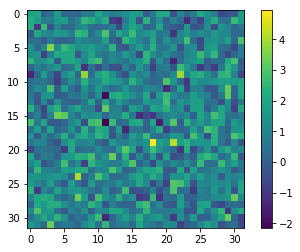

In [15]:
imshow(a[0,16,...,0]); colorbar()

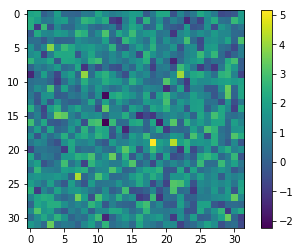

In [16]:
imshow(b[0,16,...,0]); colorbar()

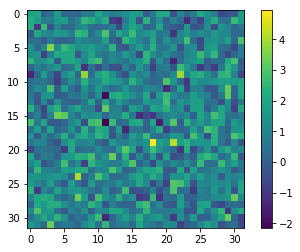

In [17]:
imshow(c[0,16,...,0] ); colorbar()

In [15]:
(c[0,16,...,0]- a[0,16,...,0])

array([[-5.2899122e-07, -1.6689301e-05, -7.0035458e-06, ...,
        -6.3180923e-05, -5.0306320e-05, -2.6822090e-05],
       [-1.8775463e-05, -2.9802322e-05, -3.8385391e-05, ...,
        -3.0994415e-05, -7.1525574e-05, -2.7894974e-05],
       [-6.6757202e-05, -8.3744526e-06, -2.9563904e-05, ...,
        -5.0544739e-05, -3.3736229e-05, -3.2782555e-05],
       ...,
       [-4.8160553e-05,  5.7697296e-05,  1.1980534e-05, ...,
        -2.5153160e-05, -2.3066998e-05, -1.5616417e-05],
       [-2.6822090e-05, -5.3405762e-05, -6.4611435e-05, ...,
        -1.2457371e-05, -3.6954880e-05, -1.3887882e-05],
       [-2.2947788e-05,  2.7894974e-05, -9.6797943e-05, ...,
        -1.3411045e-05, -4.2080879e-05, -2.3126602e-05]], dtype=float32)

In [17]:
a[0,16,...,0]- b[0,16,...,0]

array([[ 0.00613099, -0.02340388, -0.05608761, ..., -0.02670729,
        -0.09006977, -0.00217382],
       [-0.08629394, -0.03095806, -0.05743086, ..., -0.05042899,
        -0.03985929, -0.00334685],
       [-0.05479634, -0.09010005, -0.04428244, ..., -0.06274641,
        -0.01774949, -0.02867192],
       ...,
       [-0.1089263 , -0.012346  , -0.07371688, ..., -0.03315967,
        -0.03175026, -0.00106863],
       [ 0.01446393,  0.002468  , -0.03364742, ..., -0.07796574,
        -0.05069387, -0.03430223],
       [-0.03870004, -0.07524693, -0.07153463, ..., -0.08262253,
        -0.00236541, -0.03963739]], dtype=float32)

In [111]:
dist = tfd.TransformedDistribution( distribution=tfd.Normal(loc=1., scale=2.),
                    bijector=tfb.BatchNormalization())

y = tfd.MultivariateNormalDiag(loc=1., scale=2.).sample(100)  # ~ N(1, 2)
x = dist.bijector.inverse(y)  # ~ N(0, 1)
y = dist.sample()  # ~ N(1, 2)

TypeError: __init__() got an unexpected keyword argument 'scale'